# PRNGs


In [25]:
# All libraries here :
import matplotlib.pyplot as plt
import numpy as np
import time

In [26]:
# Linear Congruential generator
def LCG(x_n,m) :
  a = 1664525
  c = 1013904223
  return (a*x_n + c)%m
n = 20 #no of random numbers
seed = 71
for i in range (n) :
  seed = LCG(seed,50)
  print(i+1, seed)


1 48
2 23
3 48
4 23
5 48
6 23
7 48
8 23
9 48
10 23
11 48
12 23
13 48
14 23
15 48
16 23
17 48
18 23
19 48
20 23


In [27]:
# Discrete Exponential Generator
def deg(g,N):
  global seed
  seed=(g**seed)%N
  return seed
seed=7
for i in range(20):
  print(deg(9,101))

13
30
36
52
81
21
76
92
19
77
20
87
64
68
31
21
76
92
19
77


In [28]:
# Inversive Congruential Generator
from sympy import mod_inverse
def icg(m,a,c):
  global seed
  if seed==0:
    seed=c
    return seed/m
  else:
    seed = (a*mod_inverse(seed,m) + c)%m
    return seed/m
seed=1
for i in range(5):
  print(i+1, "seed=", seed, "random number=",icg(101,3,2))

1 seed= 1 random number= 0.04950495049504951
2 seed= 5 random number= 0.42574257425742573
3 seed= 43 random number= 0.4158415841584158
4 seed= 42 random number= 0.6633663366336634
5 seed= 67 random number= 0.9306930693069307


In [29]:
# Multiplicative Congruential Generator or Lehmer RNG
def mcg(m,a):
  global seed
  seed=(a*seed)%m
  return seed/m
seed=7
for i in range(21):
  print("seed=", seed, "random number=", mcg(100,9))

seed= 7 random number= 0.63
seed= 63 random number= 0.67
seed= 67 random number= 0.03
seed= 3 random number= 0.27
seed= 27 random number= 0.43
seed= 43 random number= 0.87
seed= 87 random number= 0.83
seed= 83 random number= 0.47
seed= 47 random number= 0.23
seed= 23 random number= 0.07
seed= 7 random number= 0.63
seed= 63 random number= 0.67
seed= 67 random number= 0.03
seed= 3 random number= 0.27
seed= 27 random number= 0.43
seed= 43 random number= 0.87
seed= 87 random number= 0.83
seed= 83 random number= 0.47
seed= 47 random number= 0.23
seed= 23 random number= 0.07
seed= 7 random number= 0.63


# Calculating periods and binning



In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import mod_inverse


Enter the number of digits in seed(even):2
Please enter seed:67
We began with 67, and have repeated ourselves after 5 steps with 10.


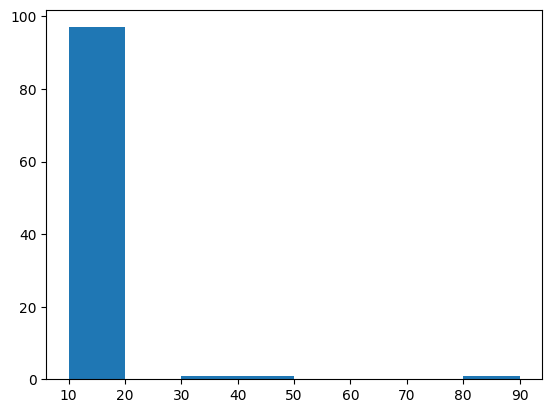

In [36]:
#1. middle square method
n = int(input('Enter the number of digits in seed(even):'))
seed = int(input('Please enter seed:'))
number = seed
already_seen = set()
counter = 0

def MSM(x_n):
    return int(str(x_n * x_n).zfill(2*n)[int(n-(n/2)):int(n+(n/2))])

while number not in already_seen:
    counter += 1
    already_seen.add(number)
    number = MSM(number)
    #print(f"#{counter}: {number}")

print(f"We began with {seed}, and" f" have repeated ourselves after {counter} steps"f" with {number}.")

msm =[]
for i in range (100) :
    seed = MSM(seed)
    op = (seed)
    msm.append(op)
msm = np.array(msm)
plt.hist(msm, int((max(msm)-min(msm))/10))
plt.show()

Please enter seed:67
We began with 67, and have repeated ourselves after 5 steps with 98.


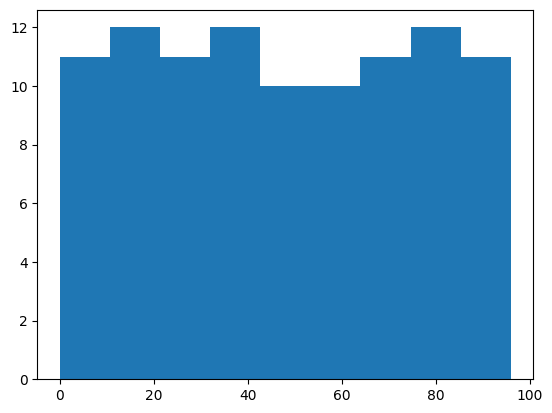

In [37]:
#2. linear congruential generator
seed = int(input('Please enter seed:'))
number = seed
already_seen = set()
counter = 0
def LCG(x_n,m):
    a = 1664525
    c = 1013904223
    return (a*x_n + c)%m
while number not in already_seen:
    counter += 1
    already_seen.add(number)
    number = LCG(number,100)
    #print(f"#{counter}: {number}")
print(f"We began with {seed}, and" f" have repeated ourselves after {counter} steps" f" with {number}.")

lcg =[]
for i in range (100) :
    seed = LCG(seed,97)
    op = (seed)
    lcg.append(op)
lcg = np.array(lcg)
plt.hist(lcg, int((max(lcg)-min(lcg))/10))
plt.show()

Please enter seed:67
We began with 67, and have repeated ourselves after 10 steps with 67.


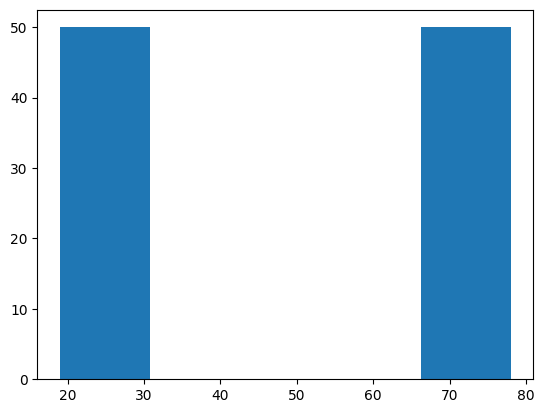

In [38]:
#3. Power generator
seed = int(input('Please enter seed:'))
number = seed
already_seen = set()
counter = 0
def PG(x_n,m):
    d = 9
    return (x_n**d)%m

while number not in already_seen:
    counter += 1
    already_seen.add(number)
    number = PG(number, 1000)
    #print(f"#{counter}: {number}")
print(f"We began with {seed}, and" f" have repeated ourselves after {counter} steps" f" with {number}.")

pg =[]
for i in range (100) :
    seed = PG(seed,97)
    op = (seed)
    pg.append(op)
pg = np.array(pg)
plt.hist(pg, int((max(pg)-min(pg))/10))
plt.show()

Please enter seed:67
We began with 67, and have repeated ourselves after 14 steps with 76.


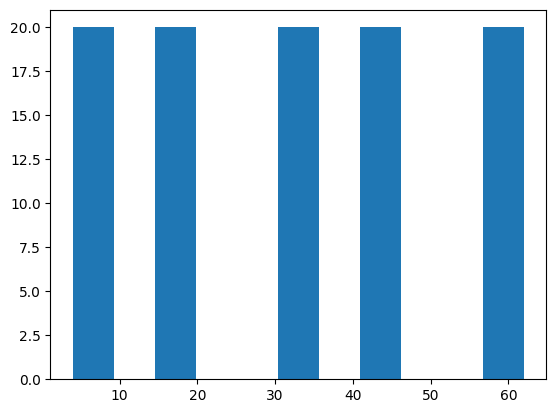

In [39]:
# 4. Discrete Exponential Generator
seed = int(input('Please enter seed:'))
number = seed
already_seen = set()
counter = 0
def DEG(x_n,N):
    g = 9
    return (g**x_n)%N

while number not in already_seen:
    counter += 1
    already_seen.add(number)
    number = DEG(number,101)
    #print(f"#{counter}: {number}")
print(f"We began with {seed}, and" f" have repeated ourselves after {counter} steps" f" with {number}.")

deg =[]
for i in range (100) :
    seed = DEG(seed,97)
    op = (seed)
    deg.append(op)
deg = np.array(deg)
plt.hist(deg, int((max(deg)-min(deg))/5))
plt.show()

1 398
2 173
3 48
4 423
5 298
6 173
7 48
8 423
9 298
10 173
11 48
12 423
13 298
14 173
15 48
16 423
17 298
18 173
19 48
20 423
21 298
22 173
23 48
24 423
25 298
26 173
27 48
28 423
29 298
30 173
31 48
32 423
33 298
34 173
35 48
36 423
37 298
38 173
39 48
40 423
41 298
42 173
43 48
44 423
45 298
46 173
47 48
48 423
49 298
50 173
51 48
52 423
53 298
54 173
55 48
56 423
57 298
58 173
59 48
60 423
61 298
62 173
63 48
64 423
65 298
66 173
67 48
68 423
69 298
70 173
71 48
72 423
73 298
74 173
75 48
76 423
77 298
78 173
79 48
80 423
81 298
82 173
83 48
84 423
85 298
86 173
87 48
88 423
89 298
90 173
91 48
92 423
93 298
94 173
95 48
96 423
97 298
98 173
99 48
100 423
101 298
102 173
103 48
104 423
105 298
106 173
107 48
108 423
109 298
110 173
111 48
112 423
113 298
114 173
115 48
116 423
117 298
118 173
119 48
120 423
121 298
122 173
123 48
124 423
125 298
126 173
127 48
128 423
129 298
130 173
131 48
132 423
133 298
134 173
135 48
136 423
137 298
138 173
139 48
140 423
141 298
142 173
143 48


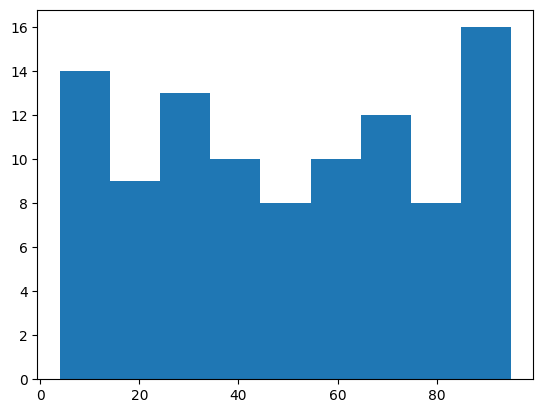

In [40]:
# Linear Congruential generator
def LCG(x_n,m) :
  a = 1664525
  c = 1013904223
  return (a*x_n + c)%m
n = 200 #no of random numbers
seed = 7
for i in range (n) :
  seed = LCG(seed,500)
  print(i+1, seed)# 5. Inversive Congruential Generator
from sympy import mod_inverse

seed = int(input('Please enter seed:'))
number = seed
already_seen = set()
counter = 0
def ICG(x_n, m):
    global seed
    a = 3
    c = 2
    if seed==0:
        seed = c
        return c
    else:
        seed = (a*mod_inverse(x_n,m) + c)%m
        return seed

while number not in already_seen:
    counter += 1
    already_seen.add(number)
    number = ICG(number, 101)
    #print(f"#{counter}: {number}")
print(f"We began with {seed}, and" f" have repeated ourselves after {counter} steps" f" with {number}.")

icg =[]
for i in range (100) :
    seed = ICG(seed,97)
    op = (seed)
    icg.append(op)
icg = np.array(icg)
plt.hist(icg, int((max(icg)-min(icg))/10))
plt.show()

Please enter seed:67
We began with 67, and have repeated ourselves after 11 steps with 188.


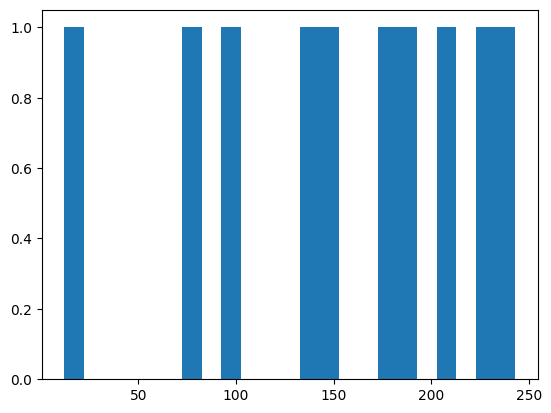

In [41]:
# 6. Blum-Blum-Shub
seed = int(input('Please enter seed:'))
number = seed
already_seen = set()
Fib_Array = [0,1]
def fibonacci(n):
   if n<0:
      print("Fibbonacci can't be computed")
   elif n<=len(Fib_Array):
      return Fib_Array[n-1]
   else:
      temp = fibonacci(n-1)+fibonacci(n-2)
      Fib_Array.append(temp)
      return temp
counter = 0
def BBS(x_n,p,q): ##p,q large primes
    return (x_n**2)% (p*q)

while number not in already_seen:
    counter += 1
    already_seen.add(number)
    number = BBS(number,11, 23)
    #print(f"#{counter}: {number}")
print(f"We began with {seed}, and" f" have repeated ourselves after {counter} steps" f" with {number}.")

bbs =[]
for i in range (10) :
    seed = BBS(seed,11,23)
    op = (seed)
    bbs.append(op)
bbs = np.array(bbs)
plt.hist(bbs, int((max(bbs)-min(bbs))/10))
plt.show()

Please enter seed:67
We began with 67, and have repeated ourselves after 10 steps with 67.


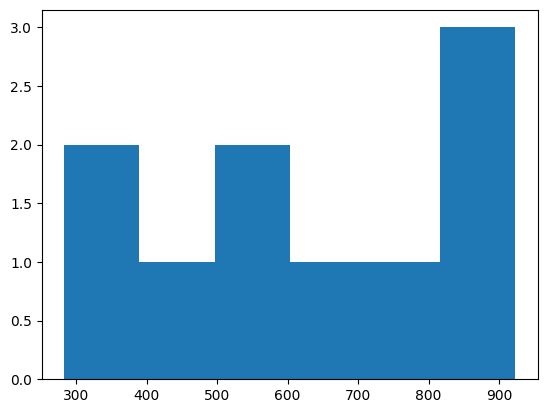

In [42]:
 # 7. Multiplicative Congruential Generator or Lehmer RNG
seed = int(input('Please enter seed:'))
number = seed
already_seen = set()
counter = 0
def MCG(x_n,m):
    a = 9
    return (a*x_n)%m
while number not in already_seen:
    counter += 1
    already_seen.add(number)
    number = MCG(number,100)
    #print(f"#{counter}: {number}")
print(f"We began with {seed}, and" f" have repeated ourselves after {counter} steps" f" with {number}.")

mcg =[]
for i in range (10) :
    seed = MCG(seed,1000)
    op = (seed)
    mcg.append(op)
mcg = np.array(mcg)
plt.hist(mcg, int((max(mcg)-min(mcg))/100))
plt.show()

# **EXCALIBUR**

In [43]:
from datetime import datetime
from sympy import mod_inverse
import time
import matplotlib.pyplot as plt

In [44]:
def swap(a,b) :
  temp = a
  a = b
  b = temp
  return a,b

def isprime(num) :
  flag = True
  if num > 1:
      # check for factors
      for i in range(2, int(num/2)):
          if (num % i) == 0:
              flag = False
              break
  return flag

def greatestPrime(a) :
  count = 0
  while count == 0 :
    if isprime(a):
      count = 1
    else :
      a += 1
  return a

In [45]:
def LCG(x_n,a,c,m) :
  return (a*x_n + c)%m

def BBS(x_n,p,q,m): ##p,q large primes
    return ((x_n**2)% (p*q))%m

def ICG(x_n, a,c,m):
  flag = False
  global seed
  while flag == False :
    try :
      seed = (a*mod_inverse(int(x_n),m) + c)%m
      flag = True
    except :
      seed += 1
  return seed

def DEG(x_n,d,m):
    return (x_n**d)%m

def LRNG(x_n,a,m) :
  return (a*x_n)%m

In [46]:
n = int(input("How many Random numbers? : "))
m = int(input("Max random number : "))
lat = 12.051
lon = 78.591
seed = int(time.time())
prng = ['f1','f2','f3','f4']
for i in range(n) :
  x = int(str(datetime.now())[-3:])
  if x%5 == 4 :
    prng[0],prng[3] = swap(prng[0],prng[3])
    prng[0],prng[2] = swap(prng[0],prng[2])
    prng[0],prng[1] = swap(prng[0],prng[1])
  else :
    if prng[x%5] == 'f1' :
      seed = LCG(seed,lat,lon,m)
    if prng[x%5] == 'f2' :
      seed = BBS(seed,greatestPrime(lat*1000),greatestPrime(lon*1000),m)
    if prng[x%5] == 'f3' :
      seed = LRNG(seed,lat,m)
    if prng[x%5] == 'f4' :
      seed = DEG(int(lat),int(seed%lon),m)
    print(i+1,int(seed))

How many Random numbers? : 30
Max random number : 100
1 72
2 46
5 84
6 32
7 64
9 73
10 72
11 67
13 15
14 86
15 26
16 0
18 0
19 0
20 0
22 1
23 12
24 56
25 53
27 56
28 60
29 76
30 76
